These are the imports I will be using for the project.

In [ ]:
import pandas
import numpy
import matplotlib
import sklearn

This is the data set from kaggle.com that I have added to a repository for separate access. The data has been reduced to the years 1970-2017 for the sake of efficiency. Headers have been included and the table displayed below is a preview of the data frame.

In [ ]:
url = 'https://raw.githubusercontent.com/moserj13/capstone/main/seattle_weather_1948-2017.csv'
df = pandas.read_csv(url)
df

DATE  PRCP  TMAX  TMIN   RAIN
0      1970-01-01   0.0    42    35  False
1      1970-01-02   0.0    44    34  False
2      1970-01-03   0.0    41    33  False
3      1970-01-04   0.0    40    29  False
4      1970-01-05   0.0    41    30  False
...           ...   ...   ...   ...    ...
17510  2017-12-10   0.0    49    34  False
17511  2017-12-11   0.0    49    29  False
17512  2017-12-12   0.0    46    32  False
17513  2017-12-13   0.0    48    34  False
17514  2017-12-14   0.0    50    36  False

[17515 rows x 5 columns]

Below, I have listed a group of descriptive visuals for the chosen data set.

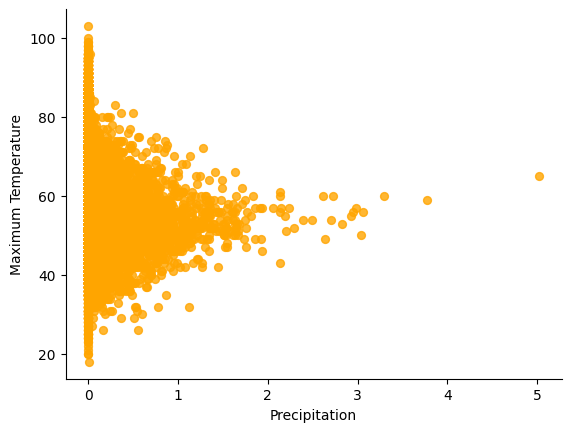

In [ ]:
# @title Precipitation VS MAX Temperature

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='PRCP', y='TMAX', s=32, alpha=.8, color='orange')
plt.xlabel('Precipitation')
plt.ylabel('Maximum Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x600 with 0 Axes>

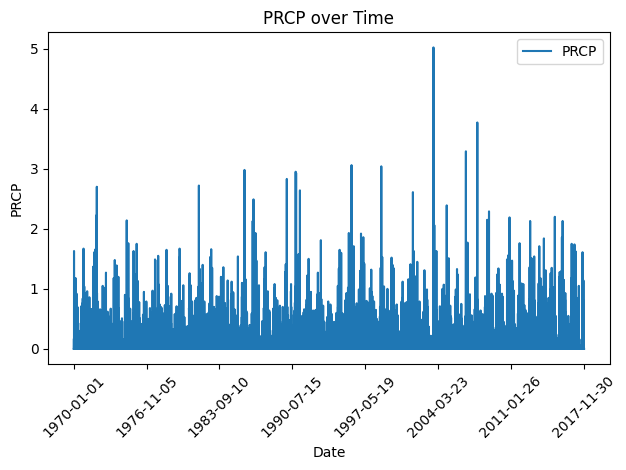

In [ ]:
# @title Precipitation over time, measured in years.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.plot.line(x='DATE', y='PRCP')
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.title('PRCP over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

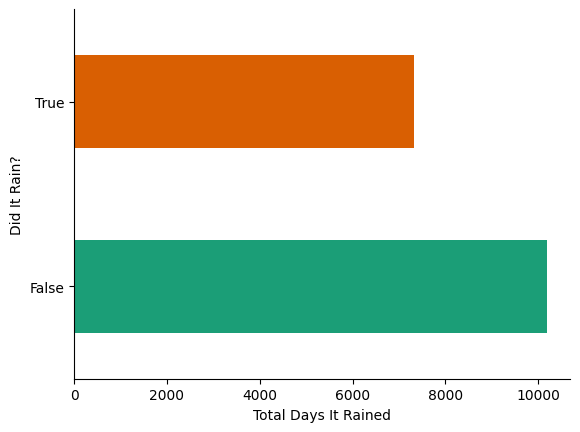

In [ ]:
# @title  A comparison of the collective total for days it has rained vs. days it hasn't.

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RAIN').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Did It Rain?')
plt.xlabel('Total Days It Rained')
plt.show()

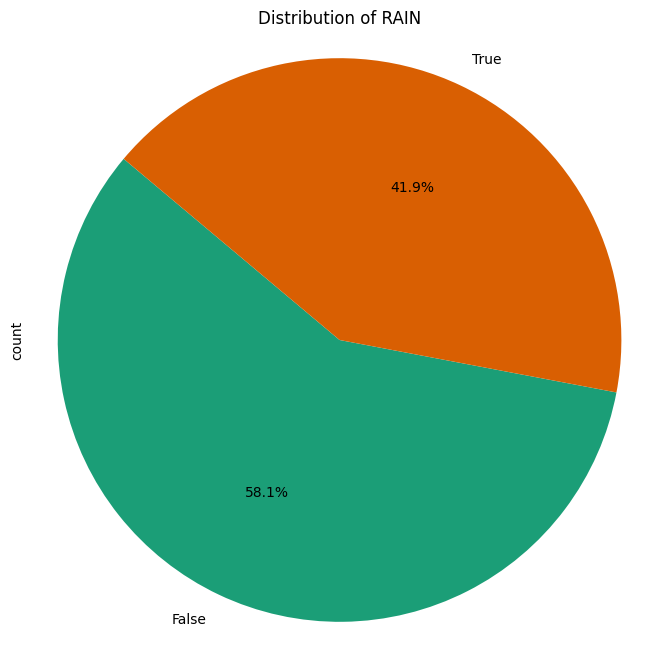

In [ ]:
# @title Percentile distribution of rainy days and non-rainy days
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 8))
df['RAIN'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=140)
plt.title('Distribution of RAIN')
plt.axis('equal')
plt.show()


In [ ]:
# @title A descriptive data-frame table with statistics.
df.describe()

PRCP          TMAX          TMIN
count  17512.000000  17515.000000  17515.000000
mean       0.104468     59.962661     45.125778
std        0.240128     12.712507      8.779895
min        0.000000     18.000000      7.000000
25%        0.000000     50.000000     39.000000
50%        0.000000     58.000000     45.000000
75%        0.100000     69.000000     52.000000
max        5.020000    103.000000     71.000000

Checking the data types that are being used in the data frame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17515 entries, 0 to 17514
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    17515 non-null  object 
 1   PRCP    17512 non-null  float64
 2   TMAX    17515 non-null  int64  
 3   TMIN    17515 non-null  int64  
 4   RAIN    17512 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 684.3+ KB


Data frame column names.

In [ ]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

Setting the independent variables on X and the dependent variable on Y.

In [ ]:
x = df[['TMAX', 'TMIN']]
y = df['RAIN']

In [ ]:
x.head()

TMAX  TMIN
0    42    35
1    44    34
2    41    33
3    40    29
4    41    30

In [ ]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: RAIN, dtype: object

Checking the data for null values that could throw off the model's results.

In [ ]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

Clean the data from the RAIN column.

In [ ]:
df_clean = df.dropna(subset=['RAIN'])


Create clean data sets after converting the Boolean RAIN column into an integer.

In [ ]:
x_clean = df_clean[['TMAX', 'TMIN']]
y_clean = df_clean['RAIN']
df_clean.loc[:, 'RAIN'] = df_clean['RAIN'].astype('int')

Split the data frame into Train/Test sets.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean, y_clean, test_size=0.2, random_state=1)

In [ ]:
print(y_train_clean.dtype)
print(y_test_clean.dtype)
y_train_clean = y_train_clean.astype(int)
y_test_clean = y_test_clean.astype(int)

object
object


This intializes the Logistic Regression Model and provides an accuracy score for the model's predictive cabalilities using the data set's parameters. Currently it scores at about 76% accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training my model with the split and cleaned data sets.
model = LogisticRegression()
model.fit(x_train_clean, y_train_clean)

# Providing an accuracy score for my model.
y_pred = model.predict(x_test_clean)
accuracy = accuracy_score(y_test_clean, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7562089637453612


In [ ]:
y_clean.value_counts()

RAIN
0    10180
1     7332
Name: count, dtype: int64

The cell above is a quick value output to ensure an accurate data split. This is to check for unseen problems. Rain is given the value of 1 and no rain is given the value of 0.

===================================================================================================================

The cell below is a simple embedded application designed to run and interact with the user. It uses custom input to create predictions for the week. I recommend inputting some temperatures that are less than 10 degrees apart and some that are more than 10 degrees apart. This will give the best results for a mixture of RAIN or NO RAIN.

In [ ]:
from datetime import datetime, timedelta
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Outer program loop.
while True:
    print("========================================================================")
    print("| Welcome to Sparky's Robot Playground. Now with more Machine Learning!|")
    print("========================================================================")
    print("\n")

# Check for valid date loop.
    while True:
        start_date_input = input("Enter the start date (YYYY-MM-DD): ")
        try:
            start_date = datetime.strptime(start_date_input, "%Y-%m-%d").date()
            break
        except ValueError:
            print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")
            print("\n")
            continue

    print("\n")

# Store user-provided time variable and initialize the temp arrays.
    start_date = datetime.strptime(start_date_input, "%Y-%m-%d").date()

    tmax_temperatures = []
    tmin_temperatures = []

# User input loop for each date. This requests the max and min temperatures.
    for i in range(7):
        while True:
            tmax = input(f"Enter TMAX temperature for {start_date + timedelta(days=i)}: ")
            if not tmax.strip():
                print("TMAX temperature cannot be empty. Please try again.")
                print("\n")
                continue
            if not tmax.isdigit():
                print("TMAX temperature must be a number. Please try again.")
                print("\n")
                continue

            tmin = input(f"Enter TMIN temperature for {start_date + timedelta(days=i)}: ")
            print("\n")

            if not tmin.strip():
                print("TMIN temperature cannot be empty. Please try again.")
                print("\n")
                continue
            if not tmin.isdigit():
                print("TMIN temperature must be a number. Please try again.")
                print("\n")
                continue
            if float(tmin) >= float(tmax):
                print("TMIN temperature must be less than TMAX temperature. Please try again.")
                print("\n")
                continue


            tmax_temperatures.append(float(tmax))
            tmin_temperatures.append(float(tmin))
            break

# Set the inputs to a numpy array.
    tmax_array = np.array(tmax_temperatures)
    tmin_array = np.array(tmin_temperatures)

# Stack the arrays to line up the max and min temps.
    days_of_the_week = np.column_stack((tmax_array, tmin_array))

    predictions = model.predict(days_of_the_week)

    print("\nHere are the predictions for the next week: \n\n")

# Iterative FOR loop to add print statements to the data.
    for i, prediction in enumerate(predictions):
        day_name = (start_date + timedelta(days=i)).strftime("%A")
        if prediction == 1:
            print(f"Rain is expected on: {day_name}, {start_date + timedelta(days=i)}")
            if i != len(predictions) - 1:
                print("----------------------------------------")
        else:
            print(f"Sunny day on: {day_name}, {start_date + timedelta(days=i)}")
            if i != len(predictions) - 1:
                print("-----------------------------------------")

    print("\nThanks for using our new weather prediction model at Sparky's Robot Playground!\n")
    print("===============================================================================")

# This is the lower end of the outer while loop. User input enables a re-run or program exit.
    run_again = input("Hint: Press any key and hit 'Enter' to run again, or 'q' to quit: ")
    print("\n")
    print("\n")
    print("\n")
    if run_again.lower() == 'q':
        print("\nGoodbye!")
        break



| Welcome to Sparky's Robot Playground. Now with more Machine Learning!|


Enter the start date (YYYY-MM-DD): 2000-01-01


Enter TMAX temperature for 2000-01-01: 90
Enter TMIN temperature for 2000-01-01: 89


Enter TMAX temperature for 2000-01-02: 100
Enter TMIN temperature for 2000-01-02: 90


Enter TMAX temperature for 2000-01-03: 100
Enter TMIN temperature for 2000-01-03: 80


Enter TMAX temperature for 2000-01-04: 100
Enter TMIN temperature for 2000-01-04: 75


Enter TMAX temperature for 2000-01-05: 100
Enter TMIN temperature for 2000-01-05: 100


TMIN temperature must be less than TMAX temperature. Please try again.


Enter TMAX temperature for 2000-01-05: 100
Enter TMIN temperature for 2000-01-05: 99


Enter TMAX temperature for 2000-01-06: 100
Enter TMIN temperature for 2000-01-06: 76


Enter TMAX temperature for 2000-01-07: 90
Enter TMIN temperature for 2000-01-07: 76



Here are the predictions for the next week: 


Rain is expected on: Saturday, 2000-01-01
-------------------

You can also relaunch the application with the play button on the upper left corner of the cell.